In [251]:
# import libraries
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
from itertools import compress
import os
from scipy.interpolate import interp1d
from datetime import datetime
from calfews_src import *
from calfews_src.util import *
# from calfews_src.visualizer import Visualizer

In [252]:
mpl.rcParams.update({'font.size': 12})

In [2]:
# scenarios = ['dry_0_FKC_CFWB', 'dry_none', 'wet_0_FKC_CFWB', 'wet_none', 'wet_1_FKC_CFWB', 'wet_100_FKC_CFWB']#, 'FKC_rehab_ownership_LWT']
scenarios = ['dry_friant', 'dry_none', 'median_friant', 'median_none', 'wet_friant', 'wet_none']#, 'median_all', 'median_none']#, 'FKC_rehab_ownership_LWT']
flows = {}
turnouts = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('FKC_experiment/FKC_experiment_capow_50yr_' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
    flows[s] = dat.loc[:, b]
    b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
    turnouts[s] = dat.loc[:, b]
index = flows[scenarios[0]].index
year = index.year
month = index.month
doy = index.dayofyear
dowy = (doy + (365-274)) % 365
wy = [year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))]

In [ ]:
### exceedance prob curves before & after, sum turnouts whole canal
cm_fall = cm.get_cmap('Reds')
cm_winter = cm.get_cmap('Purples')
cm_spring = cm.get_cmap('Blues')
cm_summer = cm.get_cmap('Greens')

color_dict = {10: cm_fall(0.3),
              11: cm_fall(0.5),
              12: cm_fall(0.7),
               1: cm_winter(0.3),
               2: cm_winter(0.5),
               3: cm_winter(0.7),
               4: cm_spring(0.3),
               5: cm_spring(0.5),
               6: cm_spring(0.7),
               7: cm_summer(0.3),
               8: cm_summer(0.5),
               9: cm_summer(0.7)}
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_dict = {i+1: month_names[i] for i in range(12)}

In [157]:
s_b4 = 'median_none'
s_after = 'median_friant'

cmap = cm.get_cmap('PuOr')

In [ ]:
### compare gains in diff parts of canal
dlist_north = ['fkc_COF_turnout', 'fkc_FRS_turnout', 'fkc_OFK_turnout','fkc_TUL_turnout', 'fkc_KWD_turnout', 'fkc_OKW_turnout']

dlist_central = ['fkc_EXE_turnout', 'fkc_LDS_turnout', 'fkc_LND_turnout','fkc_PRT_turnout', 'fkc_LWT_turnout', 'fkc_OTL_turnout',
         'fkc_TPD_turnout', 'fkc_SAU_turnout', 'fkc_TBA_turnout','fkc_OXV_turnout', 'fkc_PIX_turnout',]

dlist_south = ['fkc_DLE_turnout','fkc_KRT_turnout', 'fkc_SSJ_turnout', 'fkc_SFW_turnout',
            'fkc_NKN_turnout', 'fkc_NKB_turnout', 'fkc_XVC_turnout','fkc_KNR_turnout', 'fkc_AEC_turnout']

In [ ]:
### compare gains particular districts
dlist_north = ['fkc_TUL_turnout']

dlist_central = ['fkc_LWT_turnout']

dlist_south = ['fkc_SFW_turnout']

### Exceedances for total deliveries

In [18]:
shares = {}
for s in scenarios:
    shares[s] = json.load(open('FKC_experiment/FKC_experiment_capow_50yr_' + s + '/FKC_scenario.json'))['ownership_shares']
    shares_CFWB = json.load(open('FKC_experiment/FKC_experiment_capow_50yr_' + s + '/CFWB_scenario.json'))['ownership']
    for k in shares[s]:
        try:
            shares[s][k] = max(shares[s][k], shares_CFWB[k])
        except:
            pass
        
district_lookup = {
    'BDM': 'berrenda',
    'BLR': 'belridge',
    'BVA': 'buenavista',
    'CWO': 'cawelo',
    'HML': 'henrymiller',
    'ID4': 'ID4',
    'KND': 'kerndelta',
    'LHL': 'losthills',
    'RRB': 'rosedale',
    'SMI': 'semitropic',
    'THC': 'tehachapi',
    'TJC': 'tejon',
    'WKN': 'westkern',
    'WRM': 'wheeler',
    'KCWA': 'kcwa',
    'COB': 'bakersfield',
    'NKN': 'northkern',
    'ARV': 'arvin',
    'PIX': 'pixley',
    'DLE': 'delano',
    'EXE': 'exeter',
    'KRT': 'kerntulare',
    'LND': 'lindmore',
    'LDS': 'lindsay',
    'LWT': 'lowertule',
    'PRT': 'porterville',
    'SAU': 'saucelito',
    'SFW': 'shaffer',
    'SSJ': 'sosanjoaquin',
    'TPD': 'teapot',
    'TBA': 'terra',
    'TUL': 'tulare',
    'COF': 'fresno',
    'FRS': 'fresnoid',
    'SOC': 'socal',
    'SOB': 'southbay',
    'CCA': 'centralcoast',
    'DLR': 'dudleyridge',
    'TLB': 'tularelake',
    'KWD': 'kaweahdelta',
    'WSL': 'westlands',
    'SNL': 'sanluiswater',
    'PNC': 'panoche',
    'DLP': 'delpuerto',
    'CWC': 'chowchilla',
    'MAD': 'madera',
    'OTL': 'othertule',
    'OFK': 'otherfriant',
    'OCD': 'othercvp',
    'OEX': 'otherexchange',
    'OXV': 'othercrossvalley',
    'OSW': 'otherswp',
    'CNS': 'consolidated',
    'ALT': 'alta',
    'KRWA': 'krwa'
}

district_res = {}
for i, s in enumerate(scenarios):
    district_res[s] = {}
    dat = get_results_sensitivity_number_outside_model('FKC_experiment/FKC_experiment_capow_50yr_' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    index = dat.index
    year = index.year
    month = index.month
    dom = index.day
    doy = index.dayofyear
    dowy = (doy + (365-274)) % 365
    wy = np.array([year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))])
    for d, v in district_lookup.items():
        b = [k for k in keys if (((d in k.split('_')) or (v in k.split('_'))) and (('delivery' in k.split('_')) or ('flood' in k.split('_')) or ('recharged' in k.split('_')) or ('exchanged' in k.split('_')) or ('inleiu' in k.split('_')) or ('peiupumping' in k.split('_')) or ('banked' in k.split('_'))))]
        df = dat.loc[:, b]
        ## undo summation over years
        for y in range(df.index.year.min() + 2, df.index.year.max() + 1):
            maxprevious = df.loc[wy < y, :].iloc[-1, :]
            df.loc[wy == y, :] += maxprevious
        district_res[s][d] = df.diff()
    del dat, df
    
def total_deliveries(df):
    df['total_deliveries'] = 0.0
    for (wtype, position) in [('delivery', 2), ('flood', 2), ('recover', 1)]:
        for c in df.columns:
            try:
                if c.split('_')[position] == wtype:
                    df['total_deliveries'] += df[c]
            except:
                pass
            
for s in scenarios:
    for k in district_res[s]:
        total_deliveries(district_res[s][k])

In [335]:
def plot_exceed_probs(timeseries_b4, timeseries_after, ax, is_twinx, do_after, m, row, col, cmap_fill, color):

    exc_prob_grid = np.arange(0.001, 1, 0.001)
    def get_interp(timeseries, m):
        value = timeseries.loc[month == m]
        value.sort_values(inplace=True)
        value.reset_index(inplace=True, drop=True)
        exc_prob = np.arange(len(value), 0, -1) / (len(value) + 1)
        interp = interp1d(exc_prob, value)
        return interp
        
    interp_b4 = get_interp(timeseries_b4, m)
    interp_after = get_interp(timeseries_after, m)
    y_b4 = interp_b4(exc_prob_grid)
    y_after = interp_after(exc_prob_grid)
    ax.plot(exc_prob_grid, y_b4, c=color, ls='-')
    if do_after == 1:
        ax.plot(exc_prob_grid, y_after, c=color, ls='--')
        ax.fill_between(exc_prob_grid, y_b4, y_after, where=(y_b4 < y_after), color=cmap_fill(0.8), alpha=0.4)
        ax.fill_between(exc_prob_grid, y_b4, y_after, where=(y_b4 > y_after), color=cmap_fill(0.1), alpha=0.4)

    if row == 0:
        if col == 0:
            ax.set_title('Fall')
        elif col == 1:
            ax.set_title('Winter')
        elif col == 2:
            ax.set_title('Spring')
        elif col == 3:
            ax.set_title('Summer')                
    ax.annotate(month_dict[m], (0.5, 0.9), ha='center', xycoords='axes fraction')
    ax.set_xlim([0,1])

    return ax.get_ylim()[1]
    

In [247]:
districts = ['ARV', 'FRS']#, 'NKN', 'PIX']
districts_anon = {'ARV': 'F-1', 'FRS': 'F-19', 'NKN': 'O-1', 'PIX': 'O37'}
# district_colors = {'ARV':cm_vir(0.2), 'FRS':cm_vir(0.5), 'NKN':cm_vir(0.8)}
district_colors = {'ARV':(0.03137254901960784, 0.2897347174163783, 0.570319108035371, 1.0), 
                   'FRS':(0.6109803921568627, 0.7874202229911572, 0.8804921184159938, 1.0),
                   'NKN':(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0),
                   'PIX':(0.9865897731641676, 0.5067281814686659, 0.38123798539023457, 1.0)}

### show flow & delivery exceedances w/ dual axes

In [357]:
def fig_exceedance(districts, num_districts, do_after, plotname):  
    fig, axs = plt.subplots(3, 4, figsize=(16,8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace':0.1})
    axs2 = axs.copy()

    for i in range(1, 13):
        col = int((i - 1) / 3)
        row = (i - 1) % 3
        m = (i + 8) % 12 + 1
        ax = axs[row, col]
        ### first plot exceedance curves for total canal turnouts
        plot_exceed_probs(turnouts[s_b4].sum(axis=1), turnouts[s_after].sum(axis=1), ax, 0, do_after, m, row, col, cm.get_cmap('RdGy'), 'k')
        ### now exceedance curves for individual district total deliveries
        axs2[row, col] = ax.twinx()
        ax2 = axs2[row, col]
        if num_districts > 0:
            for d in districts[:num_districts]:
                plot_exceed_probs(district_res[s_b4][d]['total_deliveries'], district_res[s_after][d]['total_deliveries'], 
                                  ax2, 1, do_after, m, row, col, cm.get_cmap('RdGy'), district_colors[d])

                
    ymax = 13
    # ymax2 *= 2
    ymax2 = 4.5
    ### reset ylims to be consistent
    for i in range(1, 13):
        col = int((i - 1) / 3)
        row = (i - 1) % 3
        m = (i + 8) % 12 + 1
        ax = axs[row, col]
        ax.set_ylim([0, ymax])
#         if num_districts > 0:
        ax2 = axs2[row, col]
        ax2.set_ylim([0, ymax2])
        if col==3:
            ax2.tick_params(axis='y', labelcolor=district_colors[districts[0]])
            ax2.set_ylabel(ax2.get_ylabel(), color=district_colors[districts[0]])
        if row == 2:
            ax.set_xlabel('Exceedance probability')
        if col == 3:
            ax2.set_ylabel('District deliveries\n(tAF/day)', rotation=270, labelpad=30) 
        else:
            ax2.set_yticklabels([])
        if col == 0:
            ax.set_yticks([0,4,8,12])
            ax.set_ylabel('Canal flow\n(tAF/day)', rotation=90, labelpad=0) 
            
    legend_elements = [Line2D([0], [0], color='k', ls='-', label='Before expansion')]
    legend_elements += [Line2D([0], [0], color='k', ls='--', label='After expansion'), \
                           Patch(facecolor=cm.get_cmap('RdGy')(0.8), alpha=0.5, label='Gain'), \
                           Patch(facecolor=cm.get_cmap('RdGy')(0.1), alpha=0.5, label='Loss')]
    for d in districts:
        legend_elements.append(Line2D([0], [0], color=district_colors[d], label=districts_anon[d]+' deliveries'))

    axs[2,0].legend(handles=legend_elements, bbox_to_anchor=(0.05, -0.3), loc='upper left', frameon=False,
                    ncol=int((len(legend_elements)+1)/2))
               
    fig.tight_layout()
    plt.savefig('figures/' + plotname + '.png', bbox_inches='tight', dpi=500)

/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not c

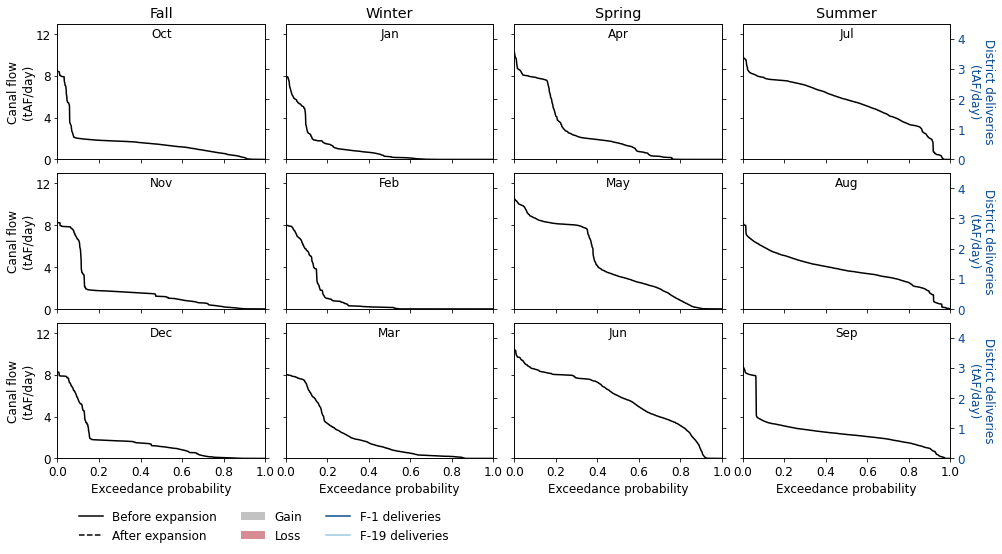

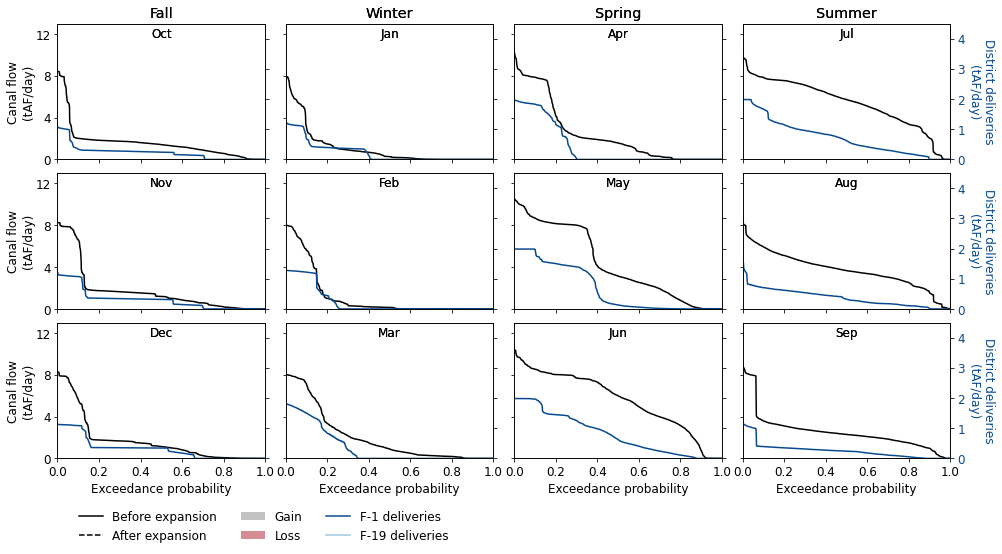

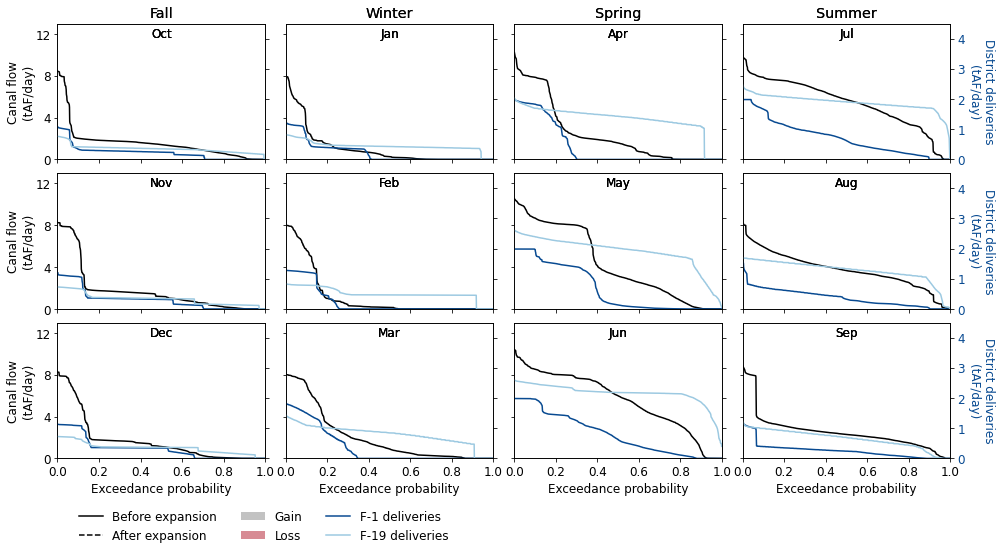

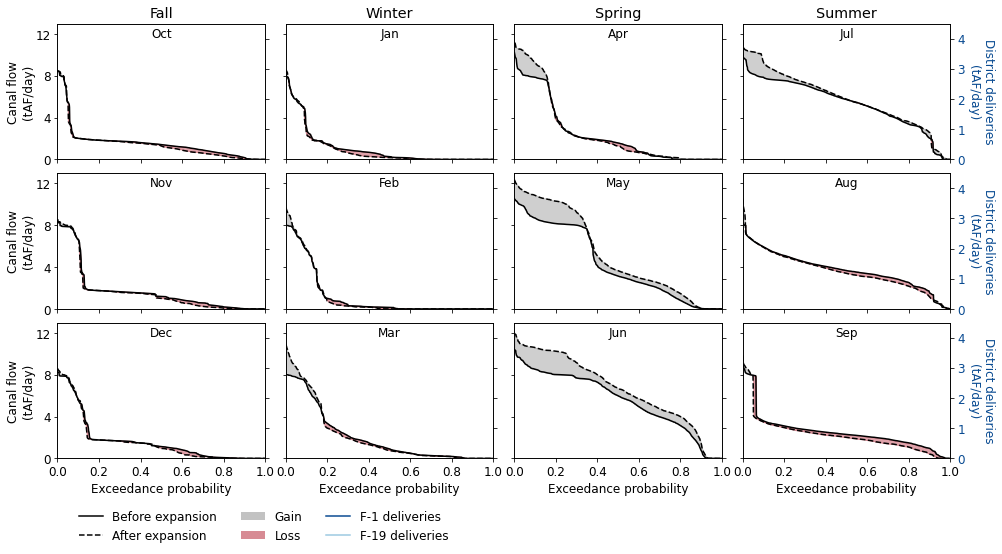

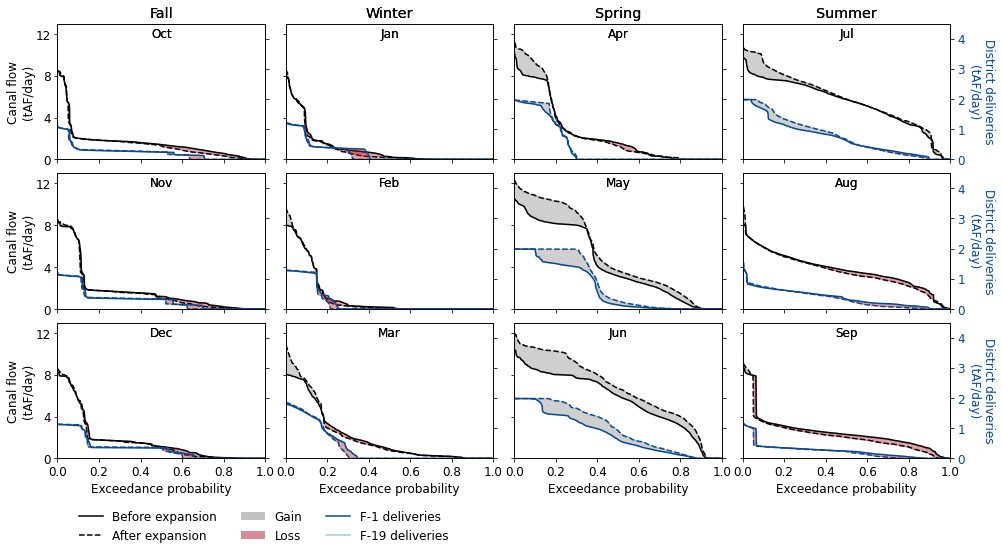

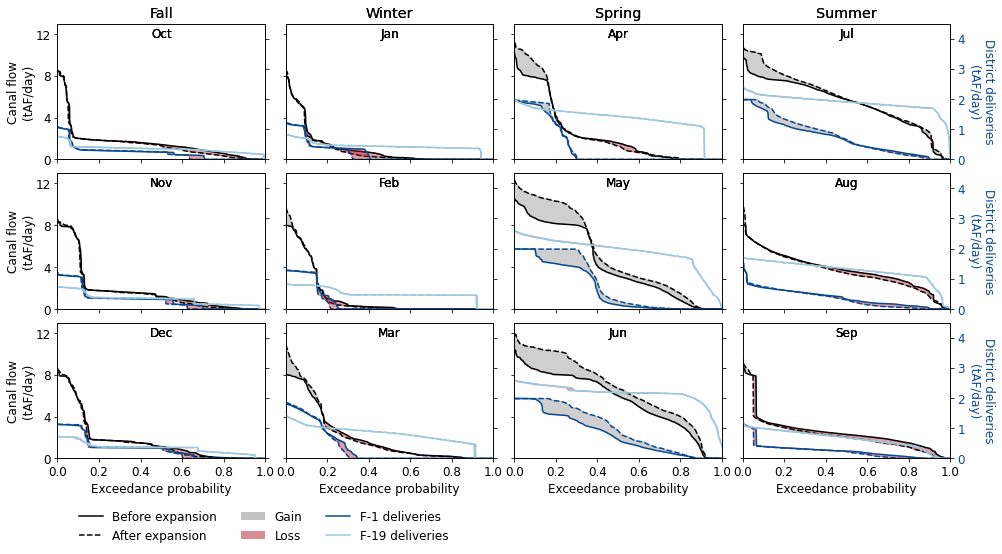

In [358]:
fig_exceedance(districts, 0, 0, 'exceed0_b4')
fig_exceedance(districts, 1, 0, 'exceed1_b4')
fig_exceedance(districts, 2, 0, 'exceed2_b4')
fig_exceedance(districts, 0, 1, 'exceed0_after')
fig_exceedance(districts, 1, 1, 'exceed1_after')
fig_exceedance(districts, 2, 1, 'exceed2_after')
